# Partie C :

L’équipe marketing très satisfaite de vos travaux précedentes, juge maintenant impératif
de mieux comprendre la valeur que chacun des clients apporte à long terme à la société. C’est
pourquoi l’équipe marketing souhaite collaborer avec vous les experts en données pour construire
un modèle de prédiction de la Valeur à Vie du Client (CLV). Pour cela, elle fournit un autre
jeu de données (customer_segmentation.csv plus volumineux pour entrainer votre modèle.

In [473]:
import pandas as pd 

In [474]:
customer = pd.read_csv("customer_segmentation.csv", delimiter=",", encoding='ISO-8859-1')
customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Charger à nouveau le fichier customer_segmentation.csv.

## Faire les transformations nécessaires pour avoir des données rangées dans l’ordre chro-nologique et vous allez prédire la valeur à vie d’un client dans Trois mois.

In [475]:
customer.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [476]:
customer.dropna(inplace=True)
customer.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [477]:
customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [478]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [479]:
# Convertir 'Order Date' en datetime avec le format correct
customer['InvoiceDate'] = pd.to_datetime(customer['InvoiceDate'], format='%m/%d/%Y %H:%M')
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [480]:
# Assurez-vous que les données sont triées par date
customer.sort_values(by='InvoiceDate', inplace=True)

customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


In [481]:
# Agrégez les montants dépensés par client sur une période donnée


In [482]:
# Assurez-vous que les données sont triées par date
customer.sort_values(by='InvoiceDate', inplace=True)

# Agrégez les montants dépensés par client sur une période donnée
customer['InvoiceDate'] = pd.to_datetime(customer['InvoiceDate'])
customer['YearMonth'] = customer['InvoiceDate'].dt.to_period('M')
# customer = customer.groupby(['CustomerID', 'YearMonth'])['TotalAmount'].sum().reset_index()


customer



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,2011-12
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,2011-12
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,2011-12


In [483]:
customer['TotalAmount'] = customer['Quantity'] * customer['UnitPrice']
customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,2011-12,23.40
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,2011-12,15.00
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,2011-12,23.40


In [484]:
from sklearn.preprocessing import LabelEncoder

# Créez une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquez LabelEncoder pour encoder les noms de produits
customer['Country Encoded'] = label_encoder.fit_transform(customer['Country'])


# Appliquez LabelEncoder pour encoder les noms de villes
customer['YearMonth Encoded'] = label_encoder.fit_transform(customer['YearMonth'])



/tmp/ipykernel_36497/340608573.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer.corr()


<Figure size 1000x800 with 0 Axes>

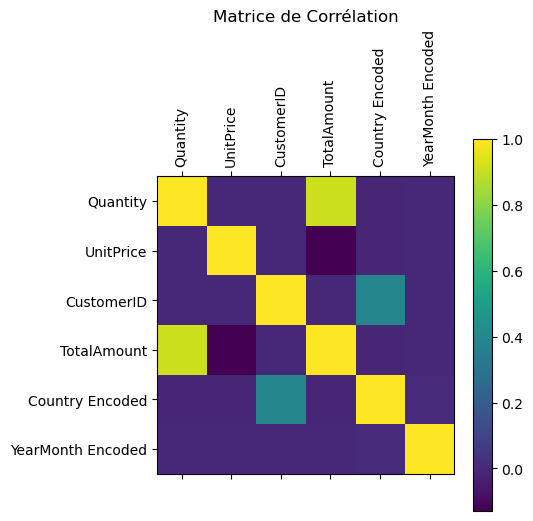

In [485]:
import matplotlib.pyplot as plt
# Calculer la matrice de corrélation
correlation_matrix = customer.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matrice de Corrélation')
plt.show()

In [486]:
customer = customer.groupby(['CustomerID','YearMonth', 'YearMonth Encoded', "Country Encoded"])['TotalAmount'].sum().reset_index()
customer

,CustomerID,YearMonth,YearMonth Encoded,Country Encoded,TotalAmount
0,12346.0,2011-01,1,35,0.00
1,12347.0,2010-12,0,16,711.79
2,12347.0,2011-01,1,16,475.39
3,12347.0,2011-04,4,16,636.25
4,12347.0,2011-06,6,16,382.52
...,...,...,...,...,...
13675,18283.0,2011-10,10,35,114.65
13676,18283.0,2011-11,11,35,651.56
13677,18283.0,2011-12,12,35,208.00
13678,18287.0,2011-05,5,35,765.28


/tmp/ipykernel_36497/340608573.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer.corr()


<Figure size 1000x800 with 0 Axes>

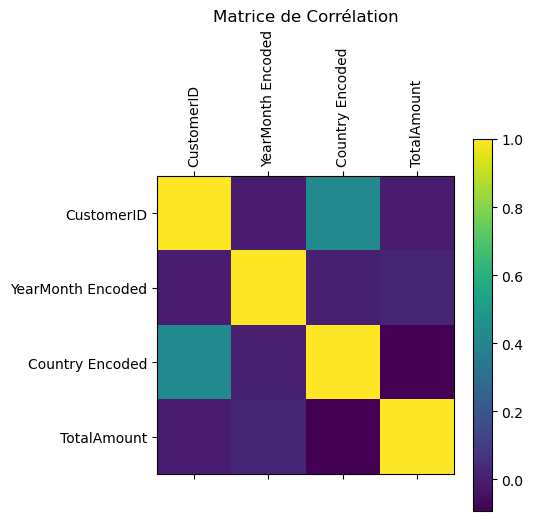

In [487]:
import matplotlib.pyplot as plt
# Calculer la matrice de corrélation
correlation_matrix = customer.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matrice de Corrélation')
plt.show()

In [488]:
from sklearn.model_selection import train_test_split
# from pandas.tseries.offsets import DateOffset
import datetime as dt

In [489]:
# Définir la date de fin de l'ensemble de test
max_date = customer['YearMonth'].max() 

# Convertir la date de fin en timestamp
test_date_timestamp = max_date.to_timestamp()

# Soustraire la période
test_date = test_date_timestamp - DateOffset(months=3)

test_date

Timestamp('2011-09-01 00:00:00')

In [490]:
test_date_period = pd.Period(test_date, freq='M')
train_data = customer[customer['YearMonth'] < test_date_period]
test_data = customer[customer['YearMonth'] >= test_date_period]
train_data

,CustomerID,YearMonth,YearMonth Encoded,Country Encoded,TotalAmount
0,12346.0,2011-01,1,35,0.00
1,12347.0,2010-12,0,16,711.79
2,12347.0,2011-01,1,16,475.39
3,12347.0,2011-04,4,16,636.25
4,12347.0,2011-06,6,16,382.52
...,...,...,...,...,...
13670,18283.0,2011-04,4,35,117.68
13671,18283.0,2011-05,5,35,99.47
13672,18283.0,2011-06,6,35,307.53
13673,18283.0,2011-07,7,35,143.19


In [495]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Créer le modèle de régression linéaire
regression_model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
X_train = train_data[['YearMonth Encoded', 'Country Encoded']]
y_train = train_data['TotalAmount']
regression_model.fit(X_train, y_train)

# Prévoir les dépenses sur l'ensemble de test
X_test = test_data[['YearMonth Encoded', 'Country Encoded']]
y_test = test_data['TotalAmount']
y_pred = regression_model.predict(X_test)

# Évaluer les performances du modèle
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")


R2 Score: 0.003201670557437142
RMSE: 2023.1959536534362
